## Introduction

### Background data

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Project description (overview)

The input to our predictor is is a medical dataset which contains 12 features that can be used to predict mortality by heart failure.
1. Data exploration
    - Principle Components Analysis (PCA) to reduce the dimension of features to have a view of the input data distribution
    - Build a preliminary linear SVM model to incorporate all the features to see the model performance.
2. Feature selection part.
    - Chi-square test to check the correlation between each categorical feature and the target death event.
    - Heat map to return the features with high correlation coefficient with death events.
    - Visualized the each feature's contribution significance in the SVM model
    - Compared the returned features and determined the final selected features
3. Model comparison and hyperparameter tuning
    - compare the performance in difference preprocessing methods MinMaxScalar, StandardScalar, RobustScalar
    - compare the performance in k-fold cross validation and leave-one-out methods
    - compare the kernel selected in Support Vector Machine (linear or rbf)
    - grid search to find the best performance model
4. Selected model performance
    - calculated the precision, recall, accuracy and f1-score
    - plot the ROC and PR-curve
    - plot the learning curve

---

## Related work

### Explorative data analysis (EDA) approach

1. [heart-fail-analysis-and-quick-prediction](https://www.kaggle.com/nayansakhiya/heart-fail-analysis-and-quick-prediction)

**Strength**: Detailed explorative and associative data analysis with great data visualization: each factor is visualized by different types of figures <br>
**Weakness**: Prediction model are quite rudimentary, the author did not select the features and tune the models' hyperparameters.<br>
**Similarity**: I learned and applied the plotly.express API to create fancy and concise figures for easy comparison; I furthered his rudimentary model by optimization

### Predictive data analysis (PDA) approach

1. [heart-failure-model-prediction-comparisons-95](https://www.kaggle.com/rude009/heart-failure-model-prediction-comparisons-95)

**Strength**: The author compares six prediction models with feature selection. The Extra Gradient Booster Classifier could achieve the accuracy up to 95.0% <br>
**Weakness**: The author consider the "time" column as the useful features. <br>
**Similarity**: I don't think "time" colume should be included since "time" column stands for Follow-up period (days), which means itself could not contribute the diseases itself. Therefore, I consider this feature as uselessness in our prediction model

2. [heart-failure-prediction-auc-0-98](https://www.kaggle.com/ksvmuralidhar/heart-failure-prediction-auc-0-98)

**Strength**: The author uses a new method: Chi-square test to find the correlation between single categorical feature with target death_event <br>
**Weakness**: The visualization part does not as fancy as previous work <br>
**Similarity**: I learned and used the Chi-square test to conduct the correlation test between single categorical data with the categorical death_event; but i didn't agree the author's method in using box plot comparison between numerical data with categorical data, I used heat map instead.

## Problem formulation

### Return the head of dataset (a overview of inside components)

In [24]:
import pandas as pd
heart_data = pd.read_csv("/home/yuxuan/kaggle/heart_failure_clinical_records_dataset.csv")
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Print the size of the dataset

In [25]:
print(heart_data.shape)

(299, 13)


### Check the ratio of the NaNs for each column

In [26]:
for col in heart_data.columns:
    print(col, str(round(100* heart_data[col].isnull().sum() / len(heart_data), 2)) + '%')

age 0.0%
anaemia 0.0%
creatinine_phosphokinase 0.0%
diabetes 0.0%
ejection_fraction 0.0%
high_blood_pressure 0.0%
platelets 0.0%
serum_creatinine 0.0%
serum_sodium 0.0%
sex 0.0%
smoking 0.0%
time 0.0%
DEATH_EVENT 0.0%


### Dataset description
There are 13 dimensions and 299 samples. All the columns are devoid of NaNs. We need make some rules before the data processing。

Target features: DEATH_EVENT (0,1)

**Categorical data**
- Sex - Gender of patient Male = 1, Female =0
- Diabetes - 0 = No, 1 = Yes
- Anaemia - 0 = No, 1 = Yes
- High_blood_pressure - 0 = No, 1 = Yes
- Smoking - 0 = No, 1 = Yes
- DEATH_EVENT - 0 = No, 1 = Yes

**Numerical data**
- Age - Age of patient
- creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L)
- ejection_fraction - Percentage of blood leaving the heart at each contraction (percentage)
- platelets - Platelets in the blood (kiloplatelets/mL)
- serum_creatinine - Level of serum creatinine in the blood (mg/dL)
- serum_sodium - Level of serum sodium in the blood (mEq/L)
- time - Follow-up period (days)

### Citation or Reference

Dataset from Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

The dataset downloaded from Kaggle https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


### Principle components analysis

PCA analysis to return the feature sample distribution

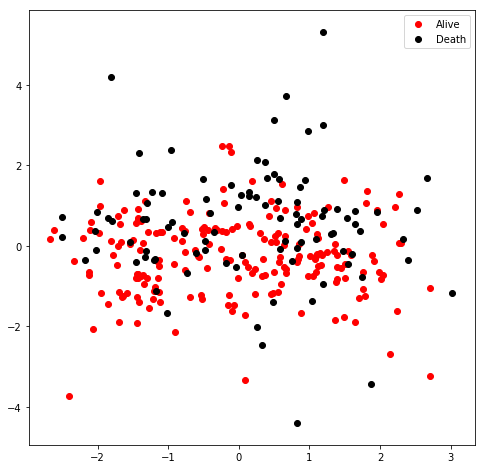

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = heart_data.iloc[:,0:11]
X = StandardScaler().fit_transform(X)
y = heart_data['DEATH_EVENT']
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.figure(figsize=(8,8))
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],label="Alive",c="red")
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],label="Death",c="black")
plt.legend(["Alive","Death"])


I would like to have a view of the feature dimension with the target situation. Therefore, we used the principle component analysis (PCA) to conduct the feature reduction to 2D for visualization. We could find that the data are densed and not easy to seperate (either linear or non-linear model), indicating that many bias or insignificant data might negatively influence the future prediction accuracy.

### Correlation analysis
I would like to find the correlation between variables, especially with the target variable: DEATH_EVENT.
In this case, I would exclude the column in time since the time tracked could not contribute to the heart failure itself.

In [ ]:
import seaborn as sn
heart_data = heart_data.drop(['time'],axis=1)
plt.figure(figsize=(12,12))
sn.heatmap(heart_data.corr(),vmin=-1,cmap='coolwarm',annot=True)

### Data partition

- As I mentioned before, I will not take the feature time into consideration. Therefore, 11 features are included in the final model prediction.
- I split the dataset into two categories. 80% for raining data and 20% for testing data.
- I used the StandardScalar normalization to preprocess the data

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = heart_data.iloc[:,0:11]
X = StandardScaler().fit_transform(X)
y = heart_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print("The number of training sample is {}".format(X_train.shape[0]))
print("The number of testing sample is {}".format(X_test.shape[0]))

The number of training sample is 239
The number of testing sample is 60


### Preliminary model in SVM

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## linear svm
sv_clf = SVC(kernel="linear",random_state=1)
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test,sv_clf_pred)
# accuracy_list.append(round(sv_clf_acc,2))
print("Accuracy of linear SVM model is :","{:.2f}%".format(100*sv_clf_acc))

## RBF kernel SVM
sv_clf = SVC(kernel="rbf",random_state=1)
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test,sv_clf_pred)
print("Accuracy of RBF SVM model is :","{:.2f}%".format(100*sv_clf_acc))

Accuracy of linear SVM model is : 80.00%
Accuracy of RBF SVM model is : 75.00%


## Optimize the model



